In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston

raw_data = load_boston()
print(raw_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
df = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
df["PRICE"] = raw_data.target
display(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Binning & Smooting

Data içinde bulunan "DIS" değişkeninde Evin Bostondaki iş merkezlerine uzaklığı ağırlıklı olarak hesaplanmış. Bu değişkeni farklı yöntemler kullanarak Ayrıklaştırmak istiyoruz.  

[]

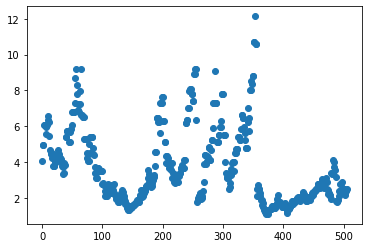

In [4]:
# Bu scatterplotı Ayrıklaştırma işlemi yapıldıktan sonraki hali ile karşılaştırabilirsiniz
DIS = df.DIS
x = np.arange(len(DIS))
plt.scatter(x, DIS)
plt.plot()

### Soru

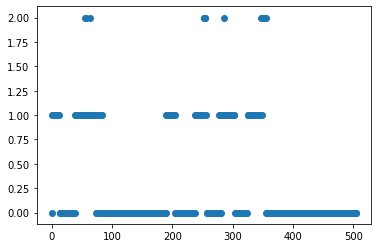

In [5]:
new_DIS, bins = pd.cut(DIS, bins=3, retbins=True, labels=[0,1,2]) 
                # NOT: bins parametresi için "3", labels için "[0,1,2]" ve retbins için "True" değerlerini kullanın
x = np.arange(len(new_DIS))
plt.scatter(x, new_DIS)

<b>pd.cut</b> fonksiyonu, değişkeni ayrıklaştırırken aşağıdaki stratejilerden hangisini kullandı?<br>
-- Equal-frequency(Eşit frekans)<br>
-- Equal-width (eşit aralıklar)

IPUCU: değişkenin min-max değerlerini ve value_count dağılımlarını kontrol edebilirsiniz.

In [6]:
print("Min:", df.DIS.min(),"Max:", df.DIS.max())
print("Sınır değerleri:", bins)
print("\n Ayrık değerlerin görülme sayısı")
print(new_DIS.value_counts(), "\n\n")

print("pd.cut fonksiyonu , değerler arası mesafe aynı olduğundan Equal-width yöntemini kullandı.")

Min: 1.1296 Max: 12.1265
Sınır değerleri: [ 1.1186031   4.79523333  8.46086667 12.1265    ]

 Ayrık değerlerin görülme sayısı
0    365
1    125
2     16
Name: DIS, dtype: int64 


pd.cut fonksiyonu , değerler arası mesafe aynı olduğundan Equal-width yöntemini kullandı.


### Soru 

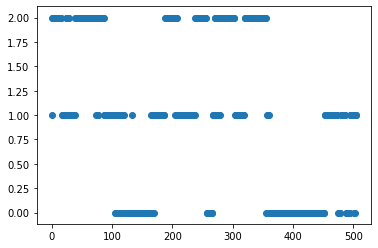

In [7]:
new_DIS, bins = pd.qcut(DIS, q=3, retbins=True, labels=[0,1,2])
                # NOT: q parametresi için "3", labels için "[0,1,2]" ve retbins için "True" değerlerini kullanın
x = np.arange(len(new_DIS))
plt.scatter(x, new_DIS)

<b>pd.qcut</b> fonksiyonu, değişkeni ayrıklaştırırken aşağıdaki stratejilerden hangisini kullandı?<br>
-- Equal-frequency(Eşit frekans)<br>
-- Equal-width (eşit aralıklar)

IPUCU: değişkenin min-max değerlerini ve value_count dağılımlarını kontrol edebilirsiniz.

In [8]:
print("Min:", df.DIS.min(),"Max:", df.DIS.max())
print("Sınır değerleri:", bins)
print("\n Ayrık değerlerin görülme sayısı")
print(new_DIS.value_counts(), "\n\n")

print("pd.qcut fonksiyonu , değerlerin frekansları birbirine eşit veya çok yakın olduğundan Equal-frequency kullandı")

Min: 1.1296 Max: 12.1265
Sınır değerleri: [ 1.1296      2.38403333  4.3257     12.1265    ]

 Ayrık değerlerin görülme sayısı
2    169
0    169
1    168
Name: DIS, dtype: int64 


pd.qcut fonksiyonu , değerlerin frekansları birbirine eşit veya çok yakın olduğundan Equal-frequency kullandı


# Feature Generation

Bu bölümde var olan değişkenlerden yeni değişkenler üretelim.

In [9]:
# seçtiğiniz iki değişkenin toplamından yeni bir değişken üretin
df["TAX+MEDV"]=df["TAX"]/df["RM"]

In [10]:
# seçtiğiniz iki değişkenin farkından yeni bir değişken üretin
df["AGE-LSTAT"]=df["AGE"]-df["LSTAT"]

In [11]:
# seçtiğiniz iki değişkenin bölümünden yeni bir değişken üretin
df["CRIM/RM"]=df["CRIM"]/df["RM"]

In [12]:
# seçtiğiniz iki değişkenin çarpımından yeni bir değişken üretin
df["CRIM*ZN"]=df["CRIM"]*df["ZN"]

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,TAX+MEDV,AGE-LSTAT,CRIM/RM,CRIM*ZN
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,45.019011,60.22,0.000961,0.11376
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,37.688834,69.76,0.004253,0.00000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,33.681280,57.07,0.003798,0.00000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,31.723350,42.86,0.004626,0.00000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,31.061984,48.87,0.009661,0.00000


sklearn kütüphanesindeki PolynomialFeatures'ı kullanarak yeni featurelar üretin (NOT:Hedef değişkeni(PRICE) yeni featureları üretirken kullanmayın.)

In [14]:
# PolynomialFeatures kullandığınız python kodunu buraya yazabilirsiniz.
from sklearn.preprocessing import PolynomialFeatures
poly_data=df.copy()
poly_data.drop(["PRICE"],axis=1,inplace=True)
poly = PolynomialFeatures(degree=2)
pd.DataFrame(poly.fit_transform(poly_data))

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,...,2026.711388,2711.044867,0.043273,5.121363,3626.4484,0.057884,6.850627,9.239376e-07,0.000109,0.012941
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,...,1420.448172,2629.173026,0.160299,0.000000,4866.4576,0.296705,0.000000,1.808998e-05,0.000000,0.000000
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,...,1134.428652,1922.190675,0.127928,0.000000,3256.9849,0.216763,0.000000,1.442625e-05,0.000000,0.000000
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,...,1006.370905,1359.662761,0.146740,0.000000,1836.9796,0.198254,0.000000,2.139624e-05,0.000000,0.000000
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,...,964.846853,1517.999160,0.300102,0.000000,2388.2769,0.472152,0.000000,9.334258e-05,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,...,1714.585484,2460.850902,0.393350,0.000000,3531.9249,0.564553,0.000000,9.023991e-05,0.000000,0.000000
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,...,1989.859669,3016.382353,0.329967,0.000000,4572.4644,0.500189,0.000000,5.471648e-05,0.000000,0.000000
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,...,1531.483599,3340.493119,0.340853,0.000000,7286.3296,0.743474,0.000000,7.586170e-05,0.000000,0.000000
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,...,1614.634430,3327.915808,0.648160,0.000000,6859.1524,1.335920,0.000000,2.601901e-04,0.000000,0.000000


# Normalizasyon

sklearn kütüphanesindeki Min-max scalerı kullanarak datayı normalize edip yeni bir dataframe içine atayın 

In [15]:
# python kodu
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

minmax_data=pd.DataFrame(minmax.fit_transform(df),columns=df.columns)
minmax_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,TAX+MEDV,AGE-LSTAT,CRIM/RM,CRIM*ZN
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222,0.125467,0.686497,0.000000,0.006892
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889,0.080325,0.768392,0.000258,0.000000
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000,0.055645,0.659456,0.000222,0.000000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111,0.043587,0.537471,0.000287,0.000000
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333,0.039514,0.589063,0.000681,0.000000


sklearn kütüphanesindeki StandardScalerı kullanarak datayı standardize edip yeni bir dataframe içine atayın 

In [16]:
# python kodu
from sklearn.preprocessing import StandardScaler
standart=StandardScaler()

standart_data=pd.DataFrame(standart.fit_transform(df),columns=df.columns)
standart_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,TAX+MEDV,AGE-LSTAT,CRIM/RM,CRIM*ZN
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686,-0.693577,0.175470,-0.415958,-0.355332
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524,-0.927610,0.564936,-0.413751,-0.405081
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247,-1.055561,0.046873,-0.414056,-0.405081
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758,-1.118072,-0.533243,-0.413502,-0.405081
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503,-1.139188,-0.287888,-0.410126,-0.405081


sklearn kütüphanesindeki RobustScalerı kullanarak datayı standardize edip yeni bir dataframe içine atayın 

In [17]:
# python kodu
from sklearn.preprocessing import RobustScaler
robut=RobustScaler()

robust_scaler=pd.DataFrame(robut.fit_transform(df),columns=df.columns)
robust_scaler.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,TAX+MEDV,AGE-LSTAT,CRIM/RM,CRIM*ZN
0,-0.069593,1.44,-0.571650,0.0,0.000000,0.496612,-0.250765,0.285777,-0.20,-0.087855,-1.339286,0.261902,-0.637681,0.351097,-0.157725,-0.106760,-0.071105,0.144183
1,-0.063755,0.00,-0.202943,0.0,-0.394286,0.287940,0.028542,0.569789,-0.15,-0.227390,-0.446429,0.261902,-0.221889,0.050157,-0.292595,0.128186,-0.065474,0.000000
2,-0.063760,0.00,-0.202943,0.0,-0.394286,1.323171,-0.334353,0.569789,-0.15,-0.227390,-0.446429,0.066675,-0.732634,1.692790,-0.366331,-0.184337,-0.066253,0.000000
3,-0.062347,0.00,-0.581720,0.0,-0.457143,1.069783,-0.646279,0.924391,-0.10,-0.279070,-0.125000,0.153016,-0.841579,1.529781,-0.402355,-0.534294,-0.064837,0.000000
4,-0.052144,0.00,-0.581720,0.0,-0.457143,1.271680,-0.475025,0.924391,-0.10,-0.279070,-0.125000,0.261902,-0.602699,1.880878,-0.414524,-0.386282,-0.056224,0.000000


# Correlation & Covariance

Bu hücrede değişkenlerin birbiri ile olan korelasyonları heatmap kullanarak görselleştirildi.<br>
Aşağıdaki sorular bu görseli incelemeye ve yorumlamaya yönelik olacaktır.


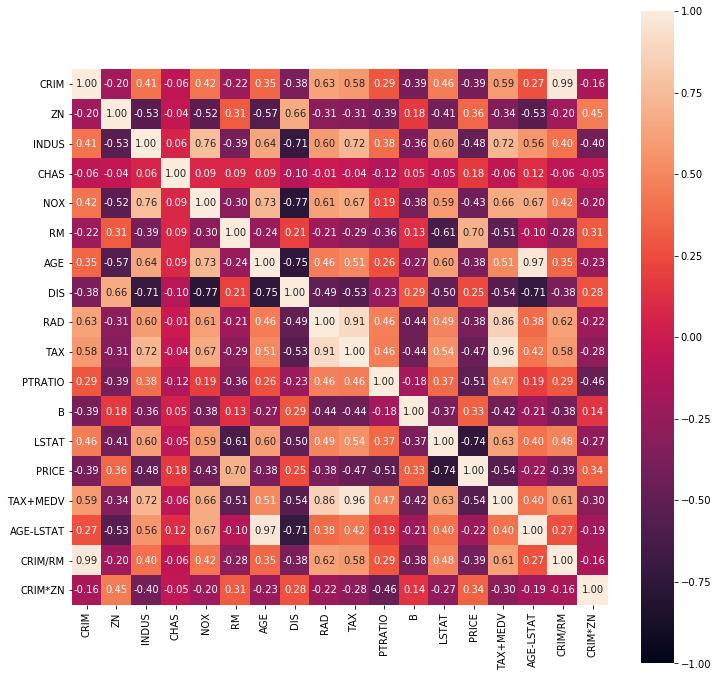

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, square=True, annot=True, fmt='.2f')
plt.show()

Aşağıda örnek iki değişken için scatter plot çizilmiştir.

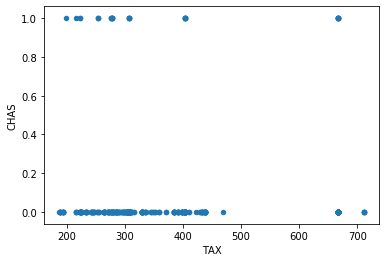

In [19]:
df.plot.scatter("TAX","CHAS")
plt.show()
# scatter plot çizerken buradan kopya çekebilirsiniz :)

Yukarıdaki heatmapten birbiri ile pozitif yüksek korelasyona sahip iki değişken için scatter plot çiziniz. Bir iki cümle ile görseli yorumlamaya çalışınız. Not:Yorum yaparken değişkenlerin yukarıdaki açıklamalarından faydalanabilirsiniz.

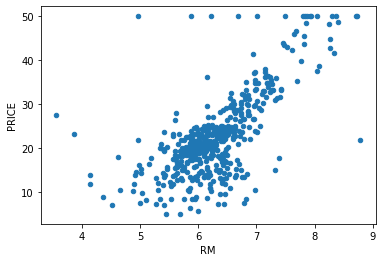

Konut başına ortalama oda sayısı arttıkça fiyat değeri de artar


In [20]:
# python kodu buraya

df.plot.scatter("RM","PRICE")
plt.show()

print("Konut başına ortalama oda sayısı arttıkça fiyat değeri de artar")

Heatmapten faydalanarak negatif korelasyonlu iki değişken için scatter plot çiziniz. Sonucu yorumlayınız

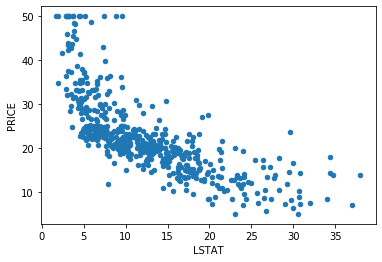

Nüfusun yüzde düşme durumu arttıkça fiyat değeri azalır.


In [21]:
# python kodu buraya

df.plot.scatter("LSTAT","PRICE")
plt.show()

print("Nüfusun yüzde düşme durumu arttıkça fiyat değeri azalır.")

Heatmapten faydalanarak düşük korelasyonlu iki değişken için scatter plot çiziniz. Sonucu yorumlayınız.

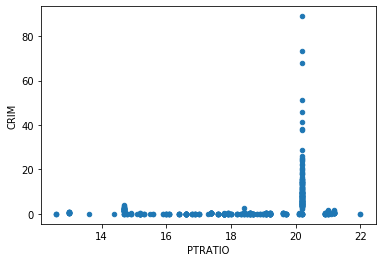

Şehre göre öğrenci-öğretmen oranı artarsa suç oranı az şekilde artar


In [22]:
# python kodu buraya

df.plot.scatter("PTRATIO","CRIM")
plt.show()

print("Şehre göre öğrenci-öğretmen oranı artarsa suç oranı az şekilde artar")

### Soru

<b>Adım 1 :</b>df.cov() methodunu kullanarak datasetteki covariance değerlerini hesaplayın.<br> 
sns.heatmap ile bu methodu görselleştirin (IPUCU: Yukarıda korelasyon gösteriminde kullanılan yöntemin aynısı)
heatmap için vmin ve vmax parametrelerini kullanmayın.

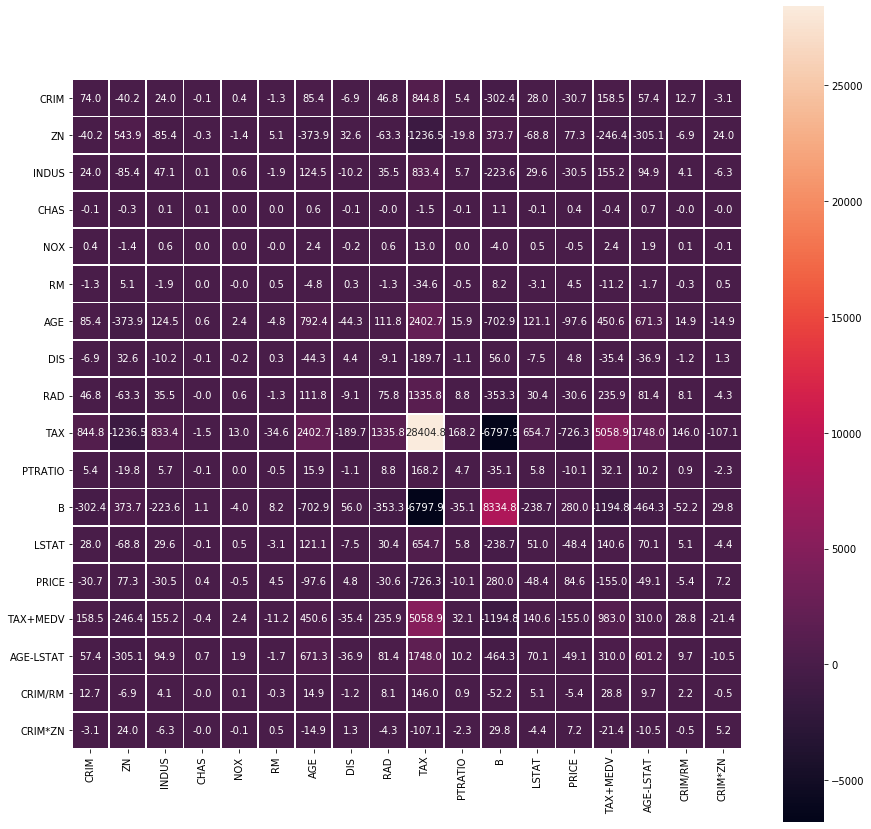

In [23]:
# Heatmap için python kodunu bu hücreye yazın
plt.figure(figsize=(15,15))
sns.heatmap(df.cov(),square=True, annot=True, fmt='.1f',linewidths=.8)
plt.show()

# Bilgi: Kovaryans değerinden anlam çıkartmak korelasyona göre daha zor çıkan grafikten bunu farkedebilirsiniz.

<b>Adım 2 :</b> Şimdi sklearn.preprocessing paketi içindeki StandardScaler objesini kullanarak datayı standardize edin ve bunu ayrı bir dataframede tutun. Standardize edilmiş dataframe objesinin Kovaryans değerini tekrar hesaplatıp görselleştirin.

<br>IPUCU : standardScalerdan gelen dönüştürülmüş datayı tekrar pandas DataFrame objesine çevirin ve bunu yaparken kolon adlarını kaybetmemeye çalışın örn: pd.DataFrame(standardize_numpy_datası, columns=df.columns)

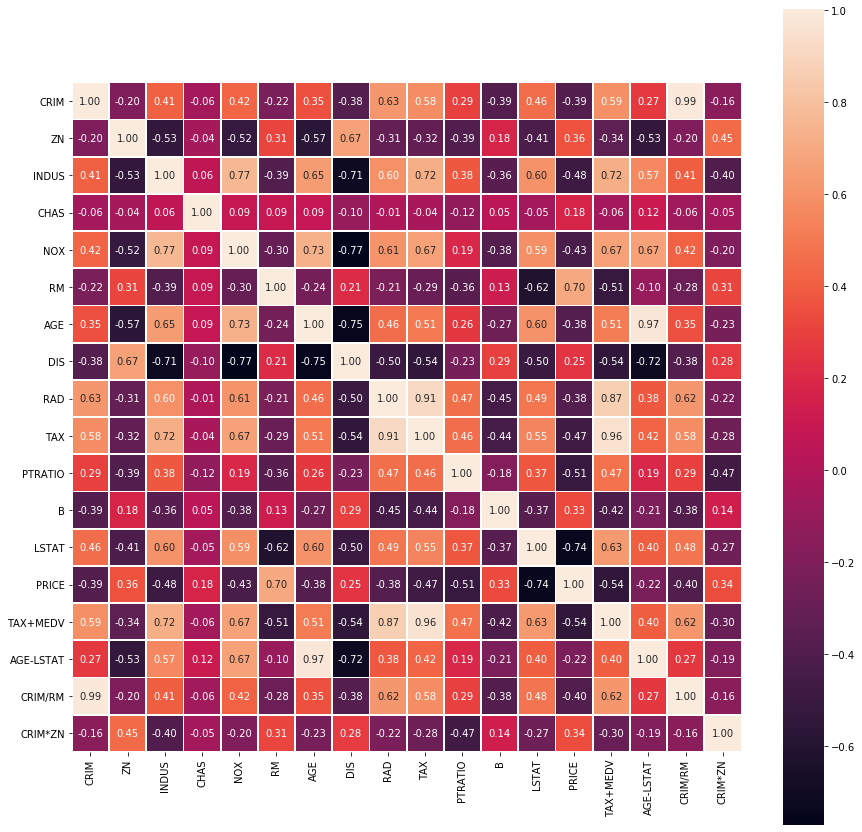

In [24]:
# Heatmap için python kodunu bu hücreye yazın
from sklearn.preprocessing import StandardScaler
standart=StandardScaler()
df_std=pd.DataFrame(standart.fit_transform(df),columns=df.columns)

plt.figure(figsize=(15,15))
sns.heatmap(df_std.cov(),square=True, annot=True, fmt='.2f',linewidths=.8)
plt.show()
# Bilgi: Ortaya çıkan grafik korelasyon grafiğine benziyor mu? :)